In [106]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [107]:


df = pd.read_excel('Data_2.xlsx')

df = df[df["code"] == "PCG"]

df["date"] = pd.to_datetime(df["date"])

df = df.sort_values(by="date")

df = df.drop(columns=['code'])


In [108]:
df['High-Low'] = (df['high'] - df['low']) 
df['Open-Close'] = (df['open'] - df['close'])
df

,date,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,High-Low,Open-Close
13972,2017-01-03,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12064,2017-01-04,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13964,2017-01-05,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12254,2017-01-06,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13968,2017-01-09,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2021-12-27,9.8,10.7,8.9,9.8,9.8,9.6,9.6,9.654,9.8,...,9.654,30200,2.915400e+08,0,0,-0.2,-0.2,-2.0408,0.2,0.2
1516,2021-12-28,9.6,10.5,8.7,9.8,10.0,9.6,9.8,9.795,9.8,...,9.795,31258,3.061533e+08,0,0,0.2,0.2,2.0833,0.4,0.0
782,2021-12-29,9.8,10.7,8.9,9.8,10.7,9.8,10.7,10.571,9.8,...,10.571,156109,1.650236e+09,0,0,0.9,0.9,9.1837,0.9,-0.9
786,2021-12-30,10.7,11.7,9.7,11.0,11.4,10.7,10.7,10.982,11.0,...,10.982,161100,1.769200e+09,0,0,0.0,0.0,0.0000,0.7,0.3


In [109]:
df

,date,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,High-Low,Open-Close
13972,2017-01-03,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12064,2017-01-04,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13964,2017-01-05,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12254,2017-01-06,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13968,2017-01-09,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2021-12-27,9.8,10.7,8.9,9.8,9.8,9.6,9.6,9.654,9.8,...,9.654,30200,2.915400e+08,0,0,-0.2,-0.2,-2.0408,0.2,0.2
1516,2021-12-28,9.6,10.5,8.7,9.8,10.0,9.6,9.8,9.795,9.8,...,9.795,31258,3.061533e+08,0,0,0.2,0.2,2.0833,0.4,0.0
782,2021-12-29,9.8,10.7,8.9,9.8,10.7,9.8,10.7,10.571,9.8,...,10.571,156109,1.650236e+09,0,0,0.9,0.9,9.1837,0.9,-0.9
786,2021-12-30,10.7,11.7,9.7,11.0,11.4,10.7,10.7,10.982,11.0,...,10.982,161100,1.769200e+09,0,0,0.0,0.0,0.0000,0.7,0.3


In [110]:
# Chia tập dữ liệu thành train và test
train = df[df['date'] <= '2021-11-30']
test = df[(df['date'] >= '2021-12-01') & (df['date'] <= '2021-12-31')]

# Lựa chọn các biến quan trọng
features = ['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low', 'average', 'adOpen', 'adHigh', 'adLow', 'adAverage', 'nmVolume', 'nmValue', 'ptVolume', 'ptValue', 'change', 'adChange', 'pctChange','High-Low','Open-Close']

# Tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu train
rf.fit(train[features], train['close'])

# Dự đoán kết quả trên tập dữ liệu test
predictions = rf.predict(test[features])

# Tính độ chính xác của mô hình
accuracy = rf.score(test[features], test['close'])

# In ra các biến quan trọng
importances = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
importances['importance'] = importances['importance'].apply(lambda x: round(x, 5))

print(importances)

         feature  importance
10     adAverage     0.25890
4           high     0.21764
6        average     0.20295
8         adHigh     0.18775
5            low     0.05730
9          adLow     0.05032
3           open     0.01599
7         adOpen     0.00809
19    Open-Close     0.00037
2     floorPrice     0.00021
17     pctChange     0.00010
16      adChange     0.00007
18      High-Low     0.00007
15        change     0.00007
1   ceilingPrice     0.00005
0     basicPrice     0.00004
11      nmVolume     0.00004
12       nmValue     0.00003
14       ptValue     0.00000
13      ptVolume     0.00000


In [111]:
X = df.drop(columns=['close', 'date'])
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=5, verbose=1)
rfe.fit(X_train, y_train)

important_features = X_train.columns[rfe.support_]


Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [112]:
n_features = len(X.columns)
ranking = rfe.ranking_
importance = [100*(n_features-r+1)/n_features for r in ranking]

# Tạo danh sách chứa tên biến và mức độ quan trọng
features = list(zip(X.columns, importance))

# Sắp xếp danh sách theo mức độ quan trọng
features_sorted = sorted(features, key=lambda x: x[1], reverse=True)

# In ra danh sách các biến theo thứ tự quan trọng giảm dần
for feature, importance in features_sorted:
    if feature != 'adClose':
        print('{}: {:.2f}%'.format(feature, importance))


high: 100.00%
average: 100.00%
adHigh: 100.00%
adAverage: 100.00%
adLow: 95.24%
low: 90.48%
open: 85.71%
adOpen: 80.95%
ceilingPrice: 76.19%
pctChange: 71.43%
basicPrice: 66.67%
floorPrice: 61.90%
nmVolume: 57.14%
nmValue: 52.38%
adChange: 47.62%
change: 42.86%
Open-Close: 38.10%
High-Low: 33.33%
ptValue: 28.57%
ptVolume: 23.81%


# TEST TRÊN 4 BIẾN 

In [113]:

#features = ["basicPrice", "ceilingPrice", "floorPrice", "open", "high", "low", "average", "adOpen", "adHigh", "adLow", "adClose", "adAverage", "nmVolume", "nmValue", "ptVolume", "ptValue", "change", "adChange", "pctChange"]
features = ['high', 'average', 'adHigh', 'adAverage']

# Chọn cột "close" làm biến mục tiêu (target variable)
target = "close"

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
#df.reset_index(inplace=True)
train = df[df['date'] <= '2021-11-30']
test = df[(df['date'] >= '2021-12-01') & (df['date'] <= '2021-12-31')]


# Tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(train[features], train[target])

# Dự đoán giá đóng cửa trên tập kiểm tra
test_predictions = rf.predict(test[features])

# Tính toán độ đo RMSE để đánh giá độ chính xác của mô hình
rmse = mean_squared_error(test[target], test_predictions, squared=False)
print("RMSE: ", rmse)

RMSE:  0.18819970891258622


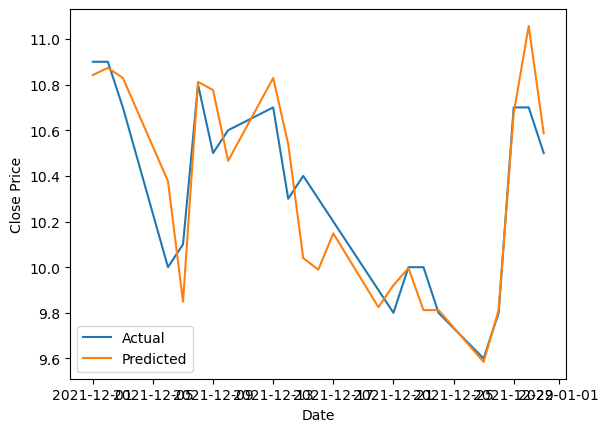

In [86]:

# Plot the actual close values
plt.plot(test['date'], test['close'], label='Actual')

# Plot the predicted close values
plt.plot(test['date'], rf.predict(test[features]), label='Predicted')

# Add axis labels and a legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()


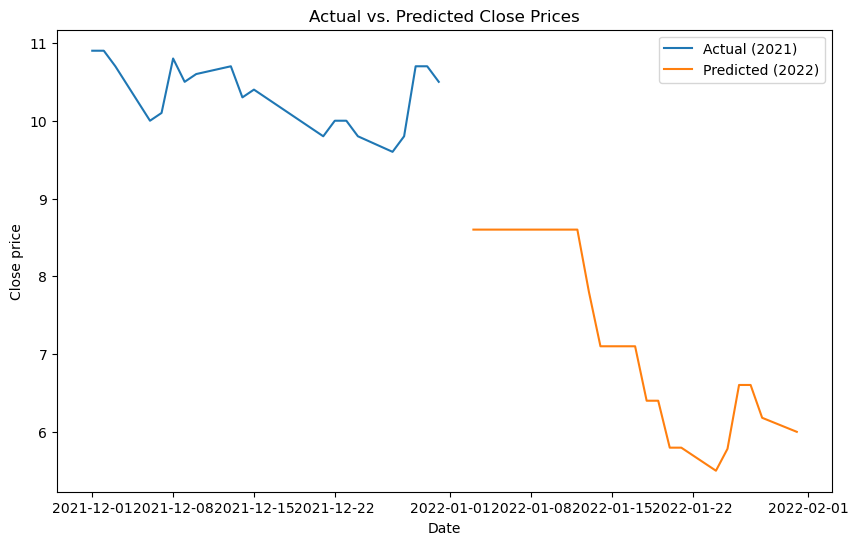

In [88]:
# Combine the train and test sets
data = pd.concat([train, test], axis=0)

# Tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the random forest model on the combined dataset
rf.fit(data[features], data['close'])

# Create a new dataframe with dates for the year 2022 and the same columns as the original dataframe
dates_2022 = pd.date_range(start='2022-01-01', end='2022-01-31', freq='B')
df_2022 = pd.DataFrame(columns=df.columns)
df_2022['date'] = dates_2022

# Make predictions for the 'close' values in the year 2022
df_2022[features] = df[features]  # Use the same set of columns as in the original dataframe
df_2022['close'] = rf.predict(df_2022[features])



# Plot the actual 'close' values for 2021 and the predicted 'close' values for 2022
plt.figure(figsize=(10, 6))
plt.plot(test['date'], test['close'], label='Actual (2021)')
plt.plot(df_2022['date'], df_2022['close'], label='Predicted (2022)')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()


# TEST TRÊN TOÀN BỘ BIẾN

In [93]:

features = ['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low', 'average', 'adOpen', 'adHigh', 'adLow', 'adAverage', 'nmVolume', 'nmValue', 'ptVolume', 'ptValue', 'change', 'adChange', 'pctChange','High_Low_per','Per_change']
#features = ['high', 'average', 'adHigh', 'adAverage']

# Chọn cột "close" làm biến mục tiêu (target variable)
target = "close"

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
#df.reset_index(inplace=True)
train = df[df['date'] <= '2021-11-30']
test = df[(df['date'] >= '2021-12-01') & (df['date'] <= '2021-12-31')]


# Tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(train[features], train[target])

# Dự đoán giá đóng cửa trên tập kiểm tra
test_predictions = rf.predict(test[features])

# Tính toán độ đo RMSE để đánh giá độ chính xác của mô hình
rmse = mean_squared_error(test[target], test_predictions, squared=False)
print("RMSE: ", rmse)

RMSE:  0.12616242119481746


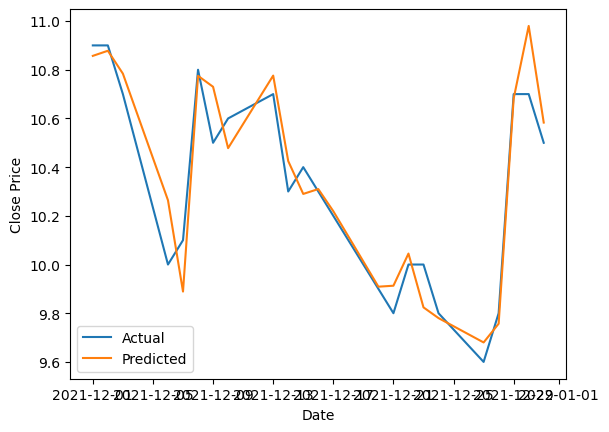

In [94]:

# Plot the actual close values
plt.plot(test['date'], test['close'], label='Actual')

# Plot the predicted close values
plt.plot(test['date'], rf.predict(test[features]), label='Predicted')

# Add axis labels and a legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()


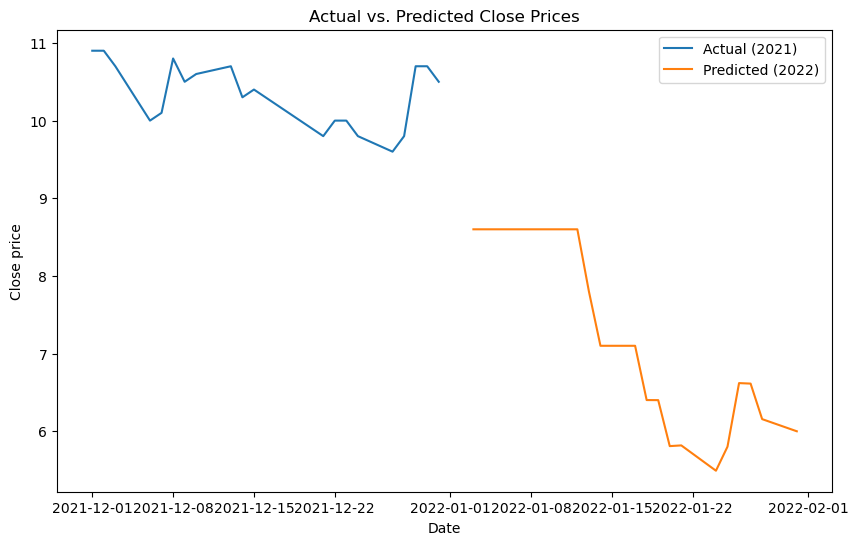

In [95]:
# Combine the train and test sets
data = pd.concat([train, test], axis=0)

# Tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the random forest model on the combined dataset
rf.fit(data[features], data['close'])

# Create a new dataframe with dates for the year 2022 and the same columns as the original dataframe
dates_2022 = pd.date_range(start='2022-01-01', end='2022-01-31', freq='B')
df_2022 = pd.DataFrame(columns=df.columns)
df_2022['date'] = dates_2022

# Make predictions for the 'close' values in the year 2022
df_2022[features] = df[features]  # Use the same set of columns as in the original dataframe
df_2022['close'] = rf.predict(df_2022[features])



# Plot the actual 'close' values for 2021 and the predicted 'close' values for 2022
plt.figure(figsize=(10, 6))
plt.plot(test['date'], test['close'], label='Actual (2021)')
plt.plot(df_2022['date'], df_2022['close'], label='Predicted (2022)')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()
